In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda_\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Logistic Regression with Tensorflow

## 1. Hands-on method

### 1.1 Load dataset

In [2]:
from sklearn.datasets import make_moons
m=1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)
X_moons_bias = np.c_[np.ones((m,1)), X_moons]

In [3]:
X_moons_bias.shape

(1000, 3)

In [4]:
y_moons.shape

(1000,)

##### Column vector

Target value y has to be made as column vector. (m,1). not (m,)

In [5]:
y_moons_column_vector = y_moons.reshape(-1,1)

In [6]:
y_moons_column_vector.shape

(1000, 1)

##### Train/Test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons_bias, y_moons_column_vector,
                                                    test_size = 0.2, random_state=42)

### 1.2 Random batch

In [8]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [9]:
X_batch, y_batch = random_batch(X_train, y_train, 5)

In [10]:
X_batch

array([[ 1.        ,  1.78308879,  0.07362381],
       [ 1.        ,  0.87258641, -0.036159  ],
       [ 1.        ,  1.00675571,  0.61455686],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.06282134,  0.2802065 ]])

In [11]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

### 1.3 Create placeholder

In [12]:
n_inputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

### 1.4 Parameters (Init X)

In [13]:
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, -1.0, seed=42), name="theta")

In [14]:
theta

<tf.Variable 'theta:0' shape=(3, 1) dtype=float32_ref>

### 1.5 Compute cost

In [15]:
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)

In [16]:
loss = tf.losses.log_loss(y, y_proba)

### 1.6 Building the model

In [17]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            
    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 1.0454909
Epoch: 100 	Loss: 0.3255847
Epoch: 200 	Loss: 0.29531196
Epoch: 300 	Loss: 0.27973396
Epoch: 400 	Loss: 0.27068263
Epoch: 500 	Loss: 0.26471546
Epoch: 600 	Loss: 0.2605678
Epoch: 700 	Loss: 0.2574337
Epoch: 800 	Loss: 0.25524867
Epoch: 900 	Loss: 0.25373438


## 2. Coursera method

### 2.1 Load dataset

In [21]:
from sklearn.datasets import make_moons
m=1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

In [22]:
y_moons_vec = y_moons.reshape(-1,1)

##### Train/Test split

In [23]:
from sklearn.model_selection import train_test_split

X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X_moons, y_moons_vec,
                                                    test_size = 0.2, random_state=42)

##### Data reshape

In [24]:
X_train, X_test = X_train_orig.T, X_test_orig.T
Y_train, Y_test = Y_train_orig.T, Y_test_orig.T

In [25]:
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape:" + str(X_train.shape))
print("y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

number of training examples = 800
number of test examples = 200
X_train shape:(2, 800)
y_train shape:(1, 800)
X_test shape:(2, 200)
Y_test shape:(1, 200)


### 2.2 Create placeholders

In [26]:
def create_placeholders(n_x, n_y):
    
    #n_X -- size of input features
    #n_Y -- number of classes (from 0 to n_Y. e.g, n_Y=1 means class 0 and 1)
    
    X = tf.placeholder(tf.float32, shape = [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, shape = [n_y, None], name="Y")
    
    return X, Y

In [27]:
X, Y = create_placeholders(2, 1)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(2, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(1, ?), dtype=float32)


### 2.3 Initializing parameters

In [28]:
def initialize_parameters():
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [1, 2], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [1, 1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1, "b1": b1}
    
    return parameters

In [29]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))

W1 = <tf.Variable 'W1:0' shape=(1, 2) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(1, 1) dtype=float32_ref>


### 2.4 Forward propagation

In [30]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    
    Z1 = tf.matmul(W1, X) + b1
    
    # Don't have to calculate A1 (calculated when we compute loss)
    
    return Z1

In [31]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(2, 1)
    parameters = initialize_parameters()
    Z1 = forward_propagation(X, parameters)
    print("Z1 = " + str(Z1))

Z1 = Tensor("add:0", shape=(1, ?), dtype=float32)


### 2.5 Compute cost

In [32]:
def compute_cost(Z1, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    
    Y_proba = tf.sigmoid(logits)
    
    #Besides, tf.reduce_mean basically does the summation over the examples.
    cost = tf.reduce_mean(tf.losses.log_loss(Y, Y_proba))
    
    return cost

In [33]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(2, 1)
    parameters = initialize_parameters()
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [34]:
def random_batch(X_train, Y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[:,rnd_indices]
    Y_batch = Y_train[:,rnd_indices]
    return X_batch, Y_batch

In [35]:
X_batch, Y_batch = random_batch(X_train, Y_train, 5)

In [36]:
X_batch.shape

(2, 5)

In [37]:
Y_batch.shape

(1, 5)

### 2.6 Building final model

In [38]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
          num_epochs = 1000, minibatch_size=50, print_cost=True):
    
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    
    
    # 2.2 Create Placeholders
    X, Y = create_placeholders(n_x, n_y)
    
    # 2.3 Initializing parameters
    parameters = initialize_parameters()
    
    # 2.4 Forward propagation
    Z1 = forward_propagation(X, parameters)
    
    # 2.5 Compute cost
    cost = compute_cost(Z1, Y)
    
    # Back propagation: Define optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    
    
    # Start the session
    with tf.Session() as sess:
        
        sess.run(init)
        
        
        # Mini-batch (Use random_batch above)
        for epoch in range(num_epochs):
            
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            
            for batch_index in range(n_batches):
                X_batch, Y_batch = random_batch(X_train, Y_train, minibatch_size)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: X_batch, Y: Y_batch})
                epoch_cost += minibatch_cost / num_minibatches
                
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" %(epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        
         # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        


        
        return parameters

In [39]:
tf.reset_default_graph() 

Cost after epoch 0: 1.362052
Cost after epoch 100: 0.866284
Cost after epoch 200: 0.866005
Cost after epoch 300: 0.866305
Cost after epoch 400: 0.866209
Cost after epoch 500: 0.866358
Cost after epoch 600: 0.866179
Cost after epoch 700: 0.866077
Cost after epoch 800: 0.865849
Cost after epoch 900: 0.866017


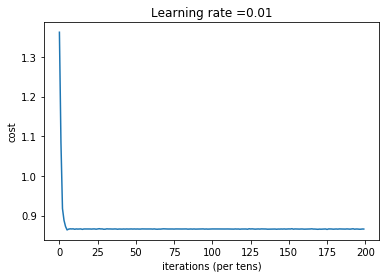

In [40]:
parameters = model(X_train, Y_train, X_test, Y_test)